# Code Example: Plotting Independent Random Variables

The following charts give examples of pairs of independent random variables plotted together.
Take the time to read the `plot` function calls to see the distributions being plotted, and note that the Python expressions for the x and y values do not refer to each other in these examples.
That's a decisive clue that these variables are independent if you can get the code or formulas for the random variables.

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

samples=1000

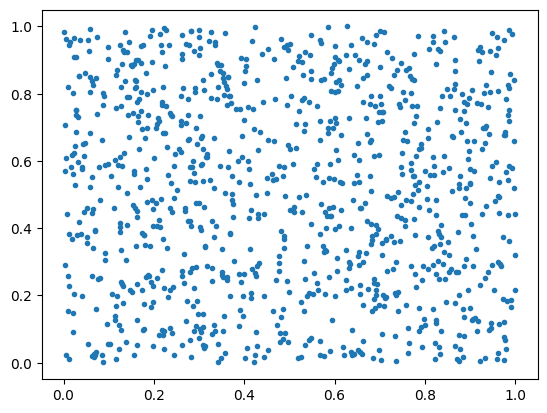

In [ ]:
plt.plot(np.random.random(size=samples), np.random.random(size=samples), ".")

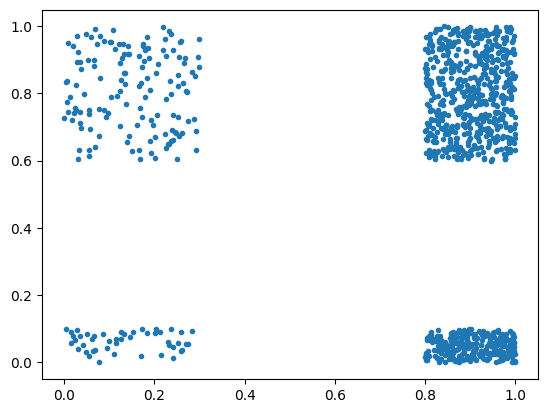

In [ ]:
def x_sample_split():
    if random.random() < 0.2:
        return random.random() * 0.3
    else:
        return random.random() * 0.2 + 0.8

def y_sample_split():
    if random.random() < 0.3:
        return random.random() * 0.1
    else:
        return random.random() * 0.4 + 0.6

plt.plot([x_sample_split() for _ in range(samples)], [y_sample_split() for _ in range(samples)], ".")

**Chart Notes:**
* This chart picks $X$ and $Y$ values from two different ranges for each, and uniformly at random from each range.
* This gives the impression of sampling from four different rectangles, but there are clearly different densities of samples in each rectangle.
* Do these different sample densities imply dependence? No. As soon as these distributions are conditioned on either an $X$ or $Y$ value, the conditional probability of the other variable will be the same.
* In fact, the conditional probabilities of this chart are always the output distributions of the two functions `x_sample_split` and `y_sample_split`.
* This example is easy to confirm since we know the ground truth of how these samples were generated, and can see in the code that they were generated independently without reference to the other variable or any other variable.

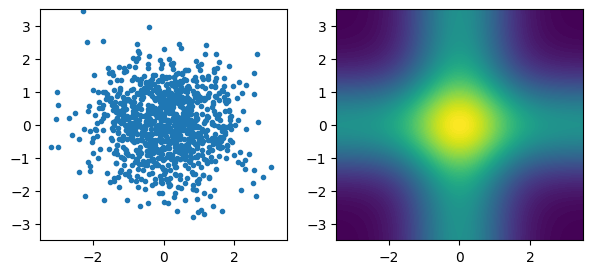

In [ ]:
from scipy.stats import norm

x_min=-3.5
x_max=3.5
y_min=-3.5
y_max=3.5

plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
axis = plt.gca()
axis.set_xlim((x_min, x_max))
axis.set_ylim((y_min, y_max))
plt.plot(np.random.normal(size=samples), np.random.normal(size=samples), ".")

plt.subplot(1, 2, 2)
xs = np.linspace(x_min, x_max, 1000)
ys = np.linspace(y_min, y_max, 1000)
zs = norm.pdf(xs) + norm.pdf(ys.reshape(len(ys), 1))
plt.contourf(xs, ys, zs, levels=100)

**Chart Notes:**
* The chart to the left shows samples a multivariate normal distribution produced by making both $X$ and $Y$ be normal distributions.
* In general, multivariate normal distributions allow correlations between dimensions, but $X$ and $Y$ were generated independently in this case.
* The lower $X$ density away from $X=0$ reduces the number of samples near the left and right edges of the chart. This appears to shrink the range of $Y$, but this is a predictable effect of having few samples, not an actual dependency between variables.
* To reinforce this point, the graph on the right shows the probability densities, so you can see the probability density is slowly declining, not getting cut off
* This example will be repeated below as an example of how dependencies between variables do not always chain together intuitively.

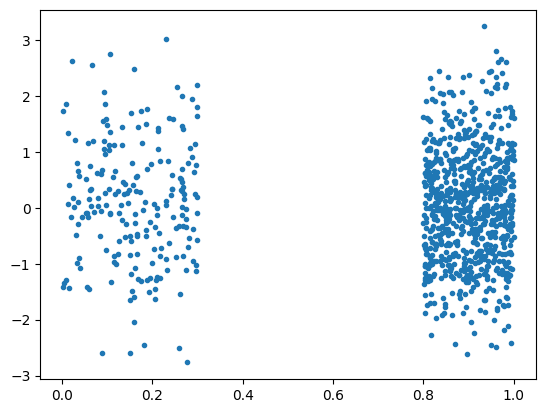

In [ ]:
plt.plot([x_sample_split() for _ in range(samples)], np.random.normal(size=samples), ".")